In [19]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

In [21]:
#读鸢尾花数据集，header函数指定标题的行，默认为零，若没有标题使用None
data = pd.read_csv(r"iris.csv",header = 0)
#data.sample(10)
#映射种类
data["Species"] = data["Species"].map({"setosa":1,"virginica":0,"versicolor":2})
data.drop("rownames",axis=1,inplace = True)
data.duplicated().any()
#len(data)
#删除重复记录
data.drop_duplicates(inplace=True)
#len(data)
#data["Species"].value_counts()
data

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


In [35]:
class KNN:
    '''使用python语言实现k近邻算法。（实现分类）'''
    def __init__(self,k):
        '''初始化方法

        Parameter
        ---
        k:int
            邻居的个数。
        '''
        self.k = k

    def fit(self,X,y):
        '''训练方法
        Parameter

        X：类数组类型，性状为：【样本数量，特征数量】
           待训练的样本特征（属性）

        y：类数组类型，形状为：【样本数量】
            每个样本的目标值（标签）。
        '''
        #将X转换成ndarray数组类型
        self.X = np.asarray(X)
        self.y = np.array(y)

    def predict(self,X):
        '''根据参数传递的样本，对样本数据进行预测。
        Parameter
        ---
        X：类数组类型，性状为：【样本数量，特征数量】
            待训练的样本特征（属性）

        Return
        ---
        result：数组类型
                预测结果。

        '''
        X = np.asarray(X)
        result = []
        #对ndarray数组进行遍历，每次取数组中的一行
        #test    train
        for x in X:
            #广播对位减法运算 对测试集中的每一个样本，依次与训练集中的所有样本求欧氏距离
            dis = np.sqrt(np.sum((x - self.X) ** 2,axis = 1))          #欧氏距离
            #返回排序的元素在原数组的索引
            index = dis.argsort()  
            #进行截断，只取距离最近的k个
            index = index[:self.k]
            #返回数组中每个元素出现的次数，元素必须是非负的整数
            count = np.bincount(self.y[index])
            #返回ndarray数组中，值最大的元素对应的索引
            #出现次数最多的元素
            result.append(count.argmax())
        return np.asarray(result)

    def predict2(self,X):
            '''根据参数传递的样本，对样本数据进行预测(考虑权重,距离越小，权重越大。使用距离的倒数)。
            Parameter
            ---
            X：类数组类型，性状为：【样本数量，特征数量】
                待训练的样本特征（属性）
    
            Return
            ---
            result：数组类型
                    预测结果。
    
            '''
            X = np.asarray(X)
            result = []
            #对ndarray数组进行遍历，每次取数组中的一行
            #test    train
            for x in X:
                #广播对位减法运算 对测试集中的每一个样本，依次与训练集中的所有样本求欧氏距离
                dis = np.sqrt(np.sum((x - self.X) ** 2,axis = 1))          #欧氏距离
                #返回排序的元素在原数组的索引
                index = dis.argsort()  
                #进行截断，只取距离最近的k个
                index = index[:self.k]
                #返回数组中每个元素出现的次数，元素必须是非负的整数
                count = np.bincount(self.y[index],weights = 1/dis[index])
                #返回ndarray数组中，值最大的元素对应的索引
                #出现次数最多的元素
                result.append(count.argmax())
            return np.asarray(result)

In [39]:
#提取每个类别的鸢尾花数据
t0 = data[data['Species'] == 0]
t1 = data[data['Species'] == 1]
t2 = data[data['Species'] == 2]
#对每个类别数据进行洗牌
t0 = t0.sample(len(t0),random_state = 0)
t1 = t1.sample(len(t1),random_state = 0)
t2 = t2.sample(len(t2),random_state = 0)
#构建训练集与测试集
train_X = pd.concat([t0.iloc[:40,:-1],t1.iloc[:40,:-1],t2.iloc[:40,:-1]])
train_y = pd.concat([t0.iloc[:40,-1],t1.iloc[:40,-1],t2.iloc[:40,-1]])

test_X = pd.concat([t0.iloc[40:,:-1],t1.iloc[40:,:-1],t2.iloc[40:,:-1]])
test_y = pd.concat([t0.iloc[40:,-1],t1.iloc[40:,-1],t2.iloc[40:,-1]])

#创建knn对象，进行训练与测试
knn = KNN(k=3)
#进行训练
knn.fit(train_X,train_y)
#进行测试获得测试结果
result = knn.predict(test_X)
#display(result)
#display(test_y)
display(np.sum(result == test_y))
display(len(result))

28

29

In [27]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [29]:
#默认情况下，matplotlib不支持中文
#设置支持中文的字体
mpl.rcParams["font.family"] = "SimHei"
#在中文字体下正常显示负号（-）
mpl.rcParams["axes.unicode_minus"] = False

findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 33457 (\N{CJK UNIFIED IDEOGRAPH-82B1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 29923 (\N{CJK UNIFIED IDEOGRAPH-74E3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH

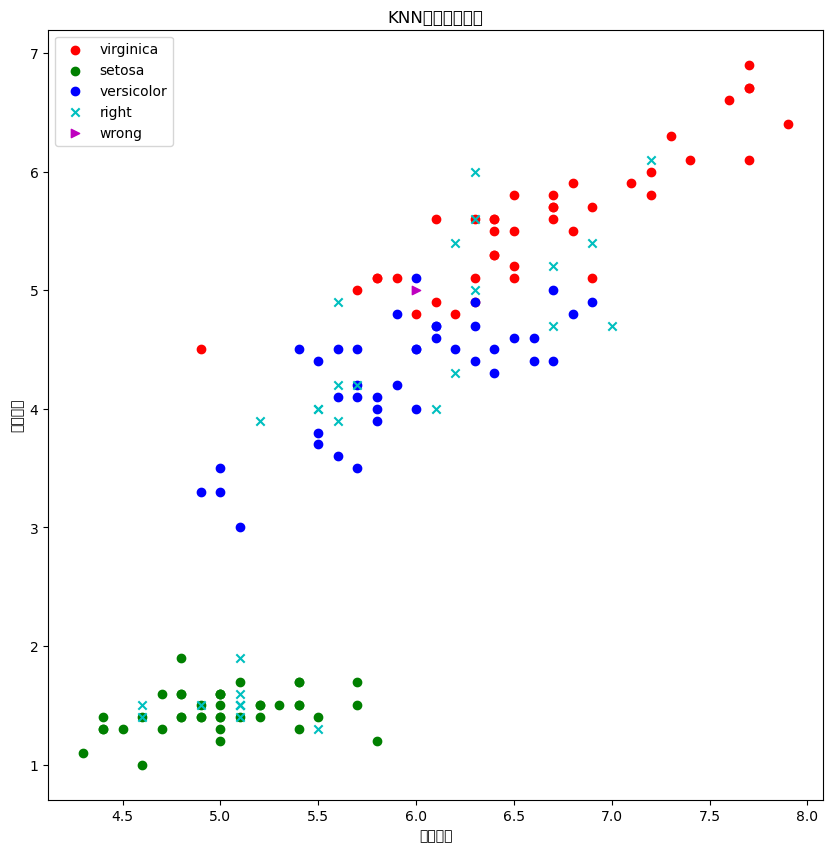

In [30]:
#"setosa":1,"virginica":0,"versicolor":2
plt.figure(figsize=(10,10))
#train
plt.scatter(x=t0["Sepal.Length"][:40],y=t0["Petal.Length"][:40],color="r",label="virginica")
plt.scatter(x=t1["Sepal.Length"][:40],y=t1["Petal.Length"][:40],color="g",label="setosa")
plt.scatter(x=t2["Sepal.Length"][:40],y=t2["Petal.Length"][:40],color="b",label="versicolor")
#test
right = test_X[result == test_y]
wrong = test_X[result != test_y]
plt.scatter(x=right["Sepal.Length"],y=right["Petal.Length"],color="c",marker="x",label="right")
plt.scatter(x=wrong["Sepal.Length"],y=wrong["Petal.Length"],color="m",marker=">",label="wrong")
plt.xlabel("花萼长度")
plt.ylabel("花瓣长度")
plt.title("KNN分类结果显示")
plt.legend(loc="best")
plt.show()


In [43]:
result2 = knn.predict2(test_X)
display(np.sum(result2 == test_y))

28